<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 3
Авторы материала: Юрий Кашницкий (@yorko) и Максим Уваров (@maxis42). Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание № 3 
## <center> Деревья решений для классификации и регрессии

**В этом задании мы разберемся с тем, как работает дерево решений в задаче регрессии, а также построим (и настроим) классифицирующие деревья решений в задаче прогнозирования сердечно-сосудистых заболеваний. 
Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1bXgaJRh4naJOGzE_Li2k50TN0kOPJdNhMtHl6H4t3Lk/edit).**

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## 1. Простой пример восстановления регрессии с помощью дерева решений

Рассмотрим следующую одномерную задачу восстановления регрессии. Неформально, надо построить функцию $a(x)$, приближающую искомую зависимость $y = f(x)$ в терминах среднеквадратичной ошибки: $min \sum_i {(a(x_i) - f(x_i))}^2$. Подробно мы рассмотрим эту задачу в следующий раз ([4-я статья курса](https://habrahabr.ru/company/ods/blog/323890/)), а пока поговорим о том, как решать эту задачу с помощью дерева решений. Предварительно прочитайте небольшой раздел ["Дерево решений в задаче регрессии"](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy-v-zadache-regressii) 3-ей статьи курса. 

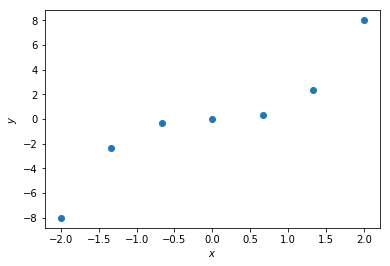

In [22]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

Проделаем несколько шагов в построении дерева решений. Исходя из соображений симметрии, выберем пороги для разбиения равными соответственно 0, 1.5 и -1.5. Напомним, что в случае задачи восстановления регрессии листовая вершина выдает среднее значение ответа по всем объектам обучающей выборки, попавшим в эту вершину.

Итак, начнём. Дерево глубины 0 состоит из одного корня, который содержит всю обучающую выборку. Как будут выглядеть предсказания данного дерева для $x \in [-2, 2]$? Постройте соответствующий график. Тут без `sklearn` – разбираемся просто с ручкой, бумажкой и Python, если надо.

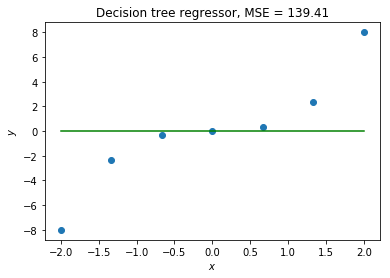

In [56]:
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.scatter(X, y)
def f(x):
    x = x.ravel()
    return x-x
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y - f(X)) ** 2))
plt.plot(X,f(X), c='g')

### Попробуем повторить код из статьи:

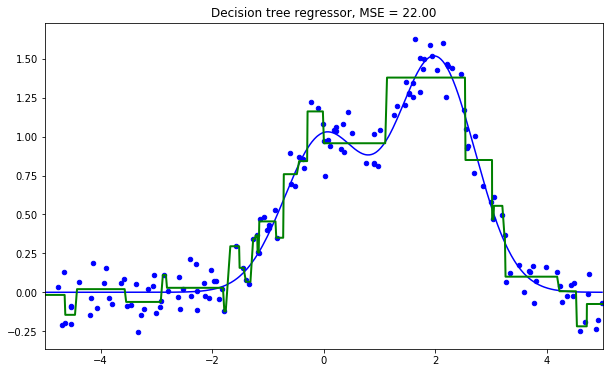

In [13]:
# Ваш код здесь
n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

In [21]:
np.random.rand(5) * 10 - 5

array([ 4.79169587, -4.75935846, -0.25163901, -3.15559626,  4.34460282])

In [18]:
X_train.shape

(7, 1)

In [40]:
y_test.shape

(1000,)

In [39]:
reg_tree_pred.shape

(1000,)

In [13]:
X_test.shape

(1000, 1)

In [18]:
X_test.shape

(1000, 1)

#### plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, c="b", s=20)

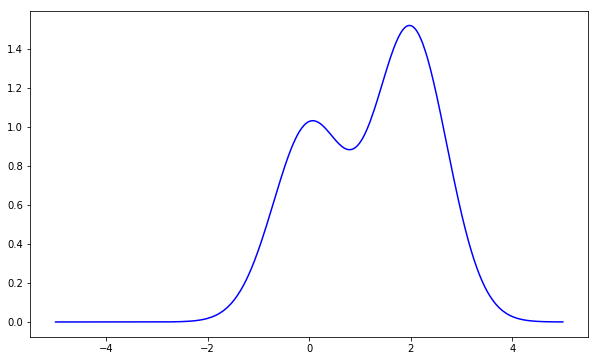

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")

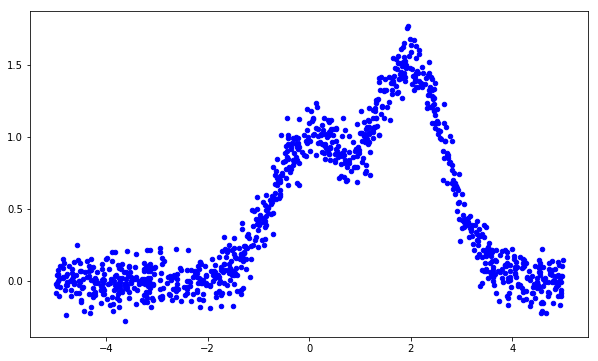

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, c="b", s=20)

Произведем первое разбиение выборки по предикату $[x < 0]$. Получим дерево глубины 1 с двумя листьями. Постройте аналогичный график предсказаний для этого дерева.

In [36]:
from sympy import diff, symbols

In [39]:
x = symbols('x')
diff((8 -x) ** 2)

2*x - 16

In [11]:
y

array([-8.        , -2.37037037, -0.2962963 ,  0.        ,  0.2962963 ,
        2.37037037,  8.        ])

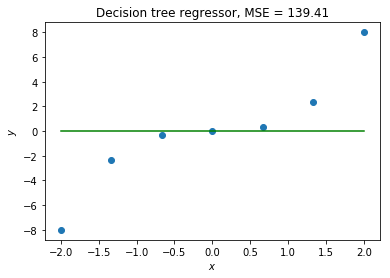

In [5]:
# Ваш код здесь
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.scatter(X, y)
def f(x):
    x = x.ravel()
    return x-x
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y - f(X)) ** 2))
plt.plot(X,f(X), c='g')

In [15]:
n_samples = len(X)

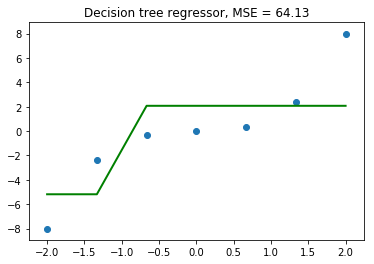

In [32]:
X_train = X.reshape((n_samples, 1))
y_train = y

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=1, random_state=17, criterion="")

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_train)
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y - reg_tree_pred) ** 2))
plt.plot(X_train, reg_tree_pred, "g", lw=2)
plt.scatter(X, y)

In [34]:
reg_tree_pred

array([-5.18518519, -5.18518519,  2.07407407,  2.07407407,  2.07407407,
        2.07407407,  2.07407407])

In [179]:
my_pred = [-64/18, -64/18, -64/18, 8/3, 8/3, 8/3, 8/3]

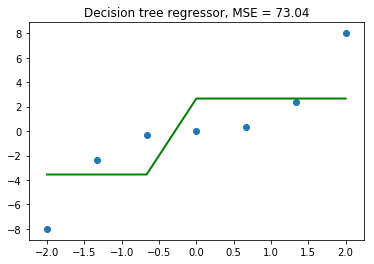

In [49]:
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y - my_pred) ** 2))
plt.plot(X, my_pred, "g", lw=2)
plt.scatter(X, y)

В алгоритме построения дерева решений признак и значение порога, по которым происходит разбиение выборки, выбираются исходя из некоторого критерия. Для регрессии обычно используется <b>дисперсионный критерий</b>:
$$Q(X, j, t) = D(X) - \dfrac{|X_l|}{|X|} D(X_l) - \dfrac{|X_r|}{|X|} D(X_r),$$
где $X$ – выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ – разбиение выборки $X$ на две части по предикату $[x_j < t]$ (то есть по $j$-ому признаку и порогу $t$), $|X|$, $|X_l|$, $|X_r|$ - размеры соответствующих выборок, а $D(X)$ – дисперсия ответов на выборке $X$:
$$D(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j – \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2,$$
где $y_i = y(x_i)$ – ответ на объекте $x_i$. При каждом разбиении вершины выбираются признак $j$ и значение порога $t$, максимизирующие значение функционала $Q(X, j, t)$.

В нашем случае признак всего один, поэтому $Q$ зависит только от значения порога $t$ (и ответов выборки в данной вершине). 

Постройте график функции $Q(X, t)$ в корне в зависимости от значения порога $t$ на отрезке $[-1.9, 1.9]$.

# Максимизируем убывание отклонения

In [9]:
from numpy import std
std(X)

1.3333333333333335

In [123]:
std(y[[2,3,4,5]])

1.0475656017578476

In [122]:
std(y)

4.4627489026360889

In [201]:
def var(X, y):
    """принимает индексы и y"""
    return (1/len(X[0]))*np.sum((y[X] - (1/len(X[0])*np.sum(y[X])))**2)

In [197]:
var(np.where(X<0),y)

10.593507087334247

In [155]:
np.where(X<10)[0]

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [160]:
def naive_regression_var_criterion(X, y, t):
    Yl = y[np.where(X < t)]
    Yr = y[np.where(X >= t)]
    return std(y) - std(Yl)*len(Yl)/len(X) - std(Yr)*len(Yr)/len(X)

In [204]:
def regression_var_criterion(X, y, t):
    Xl = np.where(X < t)
    Xr = np.where(X >= t)
    return var(np.where(X < 10),y) - var(Xl,y)*len(Xl[0])/len(X) - var(Xr,y)*len(Xr[0])/len(X)

In [167]:
Xl = np.where(X < 0)
Xr = np.where(X >= 0)
var(Xl,y)*len(Xl)/len(X), var(Xr,y)*len(Xr)/len(X)

(1.5133581553334639, 1.4736429551244365)

In [138]:
X[np.where(X < 10)[0]]

array([-2.        , -1.33333333, -0.66666667,  0.        ,  0.66666667,
        1.33333333,  2.        ])

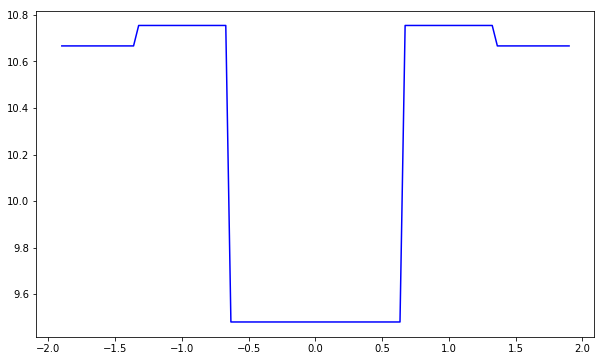

In [208]:
# Ваш код здесь
T = np.linspace(-1.9, 1.9, 100)
plt.figure(figsize=(10, 6))
plt.plot(T, [regression_var_criterion(X, y, t) for t in T], "b")

In [163]:
regression_var_criterion(X, y, 0)

16.929126657521717

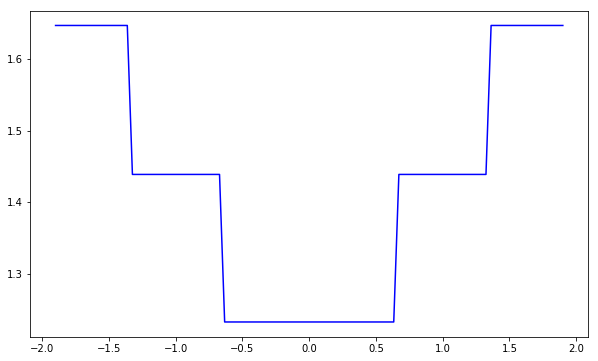

In [162]:
# Ваш код здесь
T = np.linspace(-1.9, 1.9, 100)
plt.figure(figsize=(10, 6))
plt.plot(T, [naive_regression_var_criterion(X, y, t) for t in T], "b")

# Построим такой же график, для среднеквадратичной ошибки

In [175]:
def mse_criterion(X, y, t):
    Yl = y[np.where(X < t)]
    Yr = y[np.where(X >= t)]
    lline = -64/18
    rline = 8/3
    res =  np.sum((lline-Yl)**2)
    res +=  np.sum((rline-Yr)**2)
    return res

# Надо понимать, как находить lline и rline так, чтоб был минимум res

In [176]:
mse_criterion(X,y,0)

73.042524005486968

**<font color='red'>Вопрос 1.</font> Оптимально ли с точки зрения дисперсионного критерия выбранное нами значение порога $t = 0$?**
- Да
- <b>Нет

Теперь произведем разбиение в каждой из листовых вершин. В левой (соответствующей ветви $x < 0$) – по предикату $[x < -1.5]$, а в правой (соответствующей ветви $x \geqslant 0$) – по предикату $[x < 1.5]$. Получится дерево глубины 2 с 7 вершинами и 4 листьями. Постройте график предсказаний этого дерева для $x \in [-2, 2]$.

# ??? Оптимально ли такое разбиение? -1.5, 0, 1.5?

In [182]:
X

array([-2.        , -1.33333333, -0.66666667,  0.        ,  0.66666667,
        1.33333333,  2.        ])

In [183]:
my_pred = [-1.8, -1, -1, 1.2, 1.2, 1.2, 1.8]

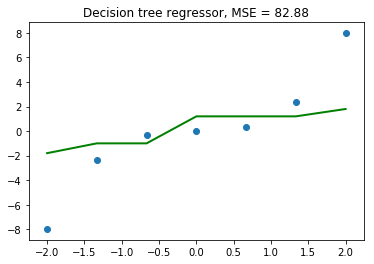

In [184]:
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y - my_pred) ** 2))
plt.plot(X, my_pred, "g", lw=2)
plt.scatter(X, y)

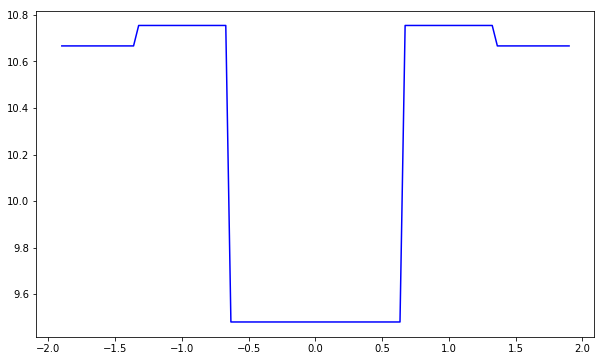

In [211]:
# Ваш код здесь
T = np.linspace(-1.9, 1.9, 100)
plt.figure(figsize=(10, 6))
plt.plot(T, [regression_var_criterion(X, y, t) for t in T], "b")

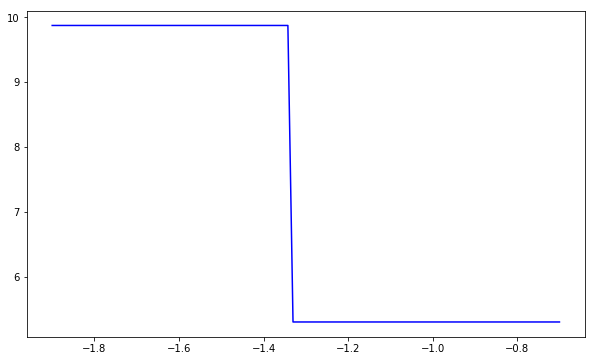

In [213]:
# Ваш код здесь
T = np.linspace(-1.9, -0.7, 100)
plt.figure(figsize=(10, 6))
plt.plot(T, [regression_var_criterion(X[np.where(X<0)], y, t) for t in T], "b")

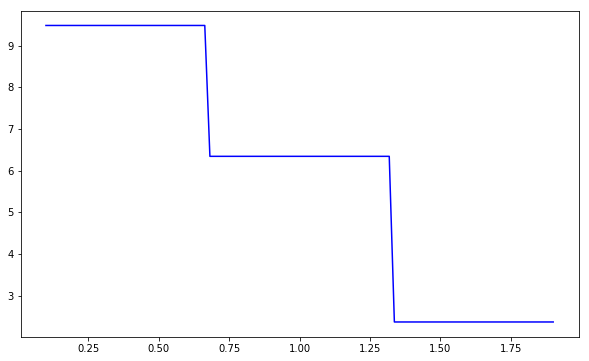

In [214]:
# Ваш код здесь
T = np.linspace(0.1, 1.9, 100)
plt.figure(figsize=(10, 6))
plt.plot(T, [regression_var_criterion(X[np.where(X>=0)], y, t) for t in T], "b")

In [199]:
var(np.where(X<0),y)

10.593507087334247

In [187]:
X[np.where(X<0)]

array([-2.        , -1.33333333, -0.66666667])

In [188]:
X

array([-2.        , -1.33333333, -0.66666667,  0.        ,  0.66666667,
        1.33333333,  2.        ])

**<font color='red'>Вопрос 2.</font> Из какого числа отрезков состоит график (необходимо считать как горизонтальные, так и вертикальные прямые), изображающий предсказания построенного дерева на отрезке [-2, 2]?**
- 5
- 6
- <b>7</b>
- 8

## 2. Построение дерева решений для прогноза сердечно-сосудистых заболеваний
Считаем в `DataFrame` знакомый нам набор данных по сердечно-сосудистым заболеваниям. 

In [360]:
df = pd.read_csv('../../data/mlbootcamp5_train.csv', 
                 index_col='id', sep=';')

In [361]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Сделайте небольшие преобразования признаков: постройте признак "возраст в годах" (полных лет), а также постройте по 3 бинарных признака на основе `cholesterol` и `gluc`, где они, соответственно, равны 1, 2 или 3. Эта техника называется dummy-кодированием или One Hot Encoding (OHE), удобней всего в данном случае использовать `pandas.get_dummmies`. Исходные признаки `cholesterol` и `gluc` после кодирования использовать не нужно.

In [362]:
# Ваш код здесь
df['age_years'] = (df['age'] // 365.25).astype(int)

In [363]:
df['cholesterol_1'] = pd.get_dummies(df.cholesterol)[1]
df['cholesterol_2'] = pd.get_dummies(df.cholesterol)[2]
df['cholesterol_3'] = pd.get_dummies(df.cholesterol)[3]

In [364]:
df['gluc_1'] = pd.get_dummies(df.gluc)[1]
df['gluc_2'] = pd.get_dummies(df.gluc)[2]
df['gluc_3'] = pd.get_dummies(df.gluc)[3]

In [365]:
df = df.drop(['cholesterol','gluc'], axis=1)

Разбейте выборку на обучающую и отложенную (holdout) части в пропорции 7/3. Для этого используйте метод `sklearn.model_selection.train_test_split`, зафиксируйте у него `random_state`=17.

In [366]:
# Ваш код здесь
X_train, X_valid, y_train, y_valid = train_test_split(df.drop('cardio', axis=1), df.cardio, test_size=3/10, random_state=17)

In [367]:
X_train.shape, X_valid.shape

((49000, 16), (21000, 16))

In [368]:
y_train.shape, y_valid.shape

((49000,), (21000,))

Обучите на выборке `(X_train, y_train)` дерево решений с ограничением на максимальную глубину в 3. Зафиксируйте у дерева `random_state=17`. Визуализируйте дерево с помошью `sklearn.tree.export_graphviz`, `dot` и `pydot`. Пример дан в [статье](https://habrahabr.ru/company/ods/blog/322534/) под спойлером "Код для отрисовки дерева". Названия файлов писать без кавычек, для того чтобы работало в jupyter notebook. Обратите внимание, что команды в Jupyter notebook, начинающиеся с восклицательного знака – это терминальные команды (которые мы обычно запускаем в терминале/командной строке).

In [369]:
# Ваш код здесь
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=3, random_state=17)

reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=17, splitter='best')

In [370]:
export_graphviz(reg_tree, out_file='churn_tree.dot', filled=True)
!dot -Tpng churn_tree.dot -o churn_tree.png

In [310]:
priznaki = [0,4,12]
# priznaki = [3,5,10,13]

In [311]:
for i in priznaki:
    print (df.drop('cardio', axis=1).columns.values[i])

age
ap_hi
cholesterol_3


**<font color='red'>Вопрос 3.</font> Какие 3 признака задействуются при прогнозе в построенном дереве решений? (то есть эти три признака "можно найти в дереве")**
- weight, height, gluc=3
- smoke, age, gluc=3
- age, weight, chol=3
- <b>age, ap_hi, chol=3

Сделайте с помощью обученного дерева прогноз для отложенной выборки `(X_valid, y_valid)`. Посчитайте долю верных ответов (accuracy).

In [371]:
reg_tree.predict(X_valid)

array([ 0.41601115,  0.41601115,  0.86156376, ...,  0.86156376,
        0.57161981,  0.57161981])

In [372]:
# Ваш код здесь
reg_tree.predict(X_valid).round()

array([ 0.,  0.,  1., ...,  1.,  1.,  1.])

# ??? Почему дробные предикты? регрессия? голосование?

In [391]:
acc1 = accuracy_score(y_valid, reg_tree.predict(X_valid).round())
acc1

0.72128571428571431

Теперь на кросс-валидации по выборке  `(X_train, y_train)`  настройте глубину дерева, чтобы повысить качество модели. Используйте GridSearchCV, 5-кратную кросс-валидацию. Зафиксируйте у дерева `random_state`=17. Перебирайте параметр `max_depth` от 2 до 10. 

In [375]:
new_tree = DecisionTreeRegressor(random_state=17)

In [376]:
tree_params = {'max_depth': list(range(2, 11))}

tree_grid = GridSearchCV(new_tree, tree_params, cv=5, n_jobs=-1, verbose=True)

Нарисуйте график того, как меняется средняя доля верных ответов на кросс-валидации в зависимости от значения `max_depth`.

In [377]:
# Ваш код здесь
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    8.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=17, splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [379]:
tree_grid.best_params_, tree_grid.best_score_

({'max_depth': 6}, 0.270850374015076)

# Почему такой маленький best_score_??

In [351]:
tree_grid.cv_results_

D:\ML\tools\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\ML\tools\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\ML\tools\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\ML\tools\Anaconda3\lib\site-packages\sklearn\utils\deprecation.

{'mean_fit_time': array([ 0.04934697,  0.07146831,  0.14243541,  0.19218245,  0.21540475,
         0.26675396,  0.33011346,  0.33051357,  0.328512  ]),
 'mean_score_time': array([ 0.00320277,  0.00400395,  0.01061006,  0.00520501,  0.00650606,
         0.01251144,  0.00720782,  0.00960908,  0.00570579]),
 'mean_test_score': array([ 0.2365529 ,  0.25641966,  0.26454863,  0.26810432,  0.27085037,
         0.26646585,  0.25901104,  0.24509817,  0.23079452]),
 'mean_train_score': array([ 0.23663433,  0.25666584,  0.26678026,  0.27431515,  0.28256709,
         0.29130078,  0.30231678,  0.31635994,  0.33452736]),
 'param_max_depth': masked_array(data = [2 3 4 5 6 7 8 9 10],
              mask = [False False False False False False False False False],
        fill_value = ?),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9},
  {'max_depth': 10}],
 'rank_test_score': array([8

Выведите лучшее значение `max_depth`, то есть такое, при котором среднее значение метрики качества на кросс-валидации максимально. Посчитайте также, какова теперь доля верных ответов на отложенной выборке. Все это можно сделать с помощью обученного экземпляра класса `GridSearchCV`.

In [392]:
# Ваш код здесь
acc2 = accuracy_score(y_valid, tree_grid.predict(X_valid).round())
acc2

0.72580952380952379

In [382]:
av_score_test = [0,0,0,0,0,0,0,0,0]
for i in range(0,9):
    for j in range(0,5):
        av_score_test[i] += tree_grid.cv_results_['split' + str(j) +'_test_score'][i]/5
        
av_score_train = [0,0,0,0,0,0,0,0,0]
for i in range(0,9):
    for j in range(0,5):
        av_score_train[i] += tree_grid.cv_results_['split' + str(j) +'_train_score'][i]/5

D:\ML\tools\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\ML\tools\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\ML\tools\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\ML\tools\Anaconda3\lib\site-packages\sklearn\utils\deprecatio

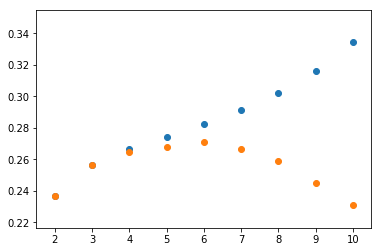

In [389]:
max_depth = [i for i in range(2,11)]
plt.scatter(max_depth, av_score_train)
plt.scatter(max_depth, av_score_test)

**<font color='red'>Вопрос 4.</font> Имеется ли на кривой валидации по максимальной глубине дерева пик `accuracy`, если перебирать `max_depth` от 2 до 10? Повысила ли настройка глубины дерева качество классификации (accuracy) более чем на 1% на отложенной выборке (надо посмотреть на выражение (acc2 - acc1) / acc1 * 100%, где acc1 и acc2 – доли верных ответов на отложенной выборке до и после настройки max_depth соответственно)?**
- да, да
- <b>да, нет</b>
- нет, да
- нет, нет

In [393]:
(acc2-acc1)/acc1*100

0.62718690169670022

Обратимся опять (как и в 1 домашке) к картинке, демонстрирующей шкалу SCORE для расчёта риска смерти от сердечно-сосудистого заболевания в ближайшие 10 лет.
<img src='../../img/SCORE2007.png' width=70%>

Создайте бинарные признаки, примерно соответствующие этой картинке:
- $age \in [45,50), \ldots age \in [60,65) $ (4 признака)
- верхнее артериальное давление: $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 признака)

Если значение возраста или артериального давления не попадает ни в один из интервалов, то все бинарные признаки будут равны нулю. Далее будем строить дерево решений с этим признаками, а также с признаками ``smoke``, ``cholesterol``  и ``gender``. Из признака ``cholesterol`` надо сделать 3 бинарных, соотв-х уникальным значениям признака ( ``cholesterol``=1,  ``cholesterol``=2 и  ``cholesterol``=3), эта техника называется dummy-кодированием или One Hot Encoding (OHE). Признак ``gender`` надо перекодировать: значения 1 и 2 отобразить на 0 и 1. Признак лучше переименовать в ``male`` (0 – женщина, 1 – мужчина). В общем случае кодирование значений делает ``sklearn.preprocessing.LabelEncoder``, но в данном случае легко обойтись и без него.

Итак, дерево решений строится на 12 бинарных признаках (исходные признаки не берем).

Постройте дерево решений с ограничением на максимальную глубину = 3 и обучите его на всей исходной обучающей выборке. Используйте `DecisionTreeClassifier`, на всякий случай зафикисровав `random_state=17`, остальные аргументы (помимо `max_depth` и `random_state`) оставьте по умолчанию. 

**<font color='red'>Вопрос 5.</font> Какой бинарный признак из 12 перечисленных оказался самым важным для обнаружения ССЗ, то есть поместился в вершину построенного дерева решений?**
- Верхнее артериальное давление от 160 до 180 (мм рт.ст.)
- Пол мужской / женский
- Верхнее артериальное давление от 140 до 160 (мм рт.ст.)
- Возраст от 50 до 55 (лет)
- Курит / не курит
- Возраст от 60 до 65 (лет)

In [ ]:
# Ваш код здесь